## Import Libraries 

In [74]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Import The Data 

In [72]:
df = pd.read_csv('/Users/ramazansamilacak/Desktop/Netflix TV Shows  and Movies/Netflix TV Shows and Movies.csv')

## Basic Informations about the Data

In [76]:
df.head(5)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [77]:
df.shape

(5283, 11)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [79]:
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [80]:
df.columns

Index(['index', 'id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

## Nan Values 

In [81]:
df.isna().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

## Analis and Visualisation of Data

### IMDb Distribution Analysis

In [82]:
# Drop the Null values of 'imdb_votes' 
df = df.dropna(subset=['imdb_votes'])

In [83]:
df.groupby('imdb_votes')['title'].count()

imdb_votes
5.0          4
6.0          8
7.0          6
8.0          5
9.0          6
            ..
1346020.0    1
1472668.0    1
1727694.0    1
1994599.0    1
2268288.0    1
Name: title, Length: 3831, dtype: int64

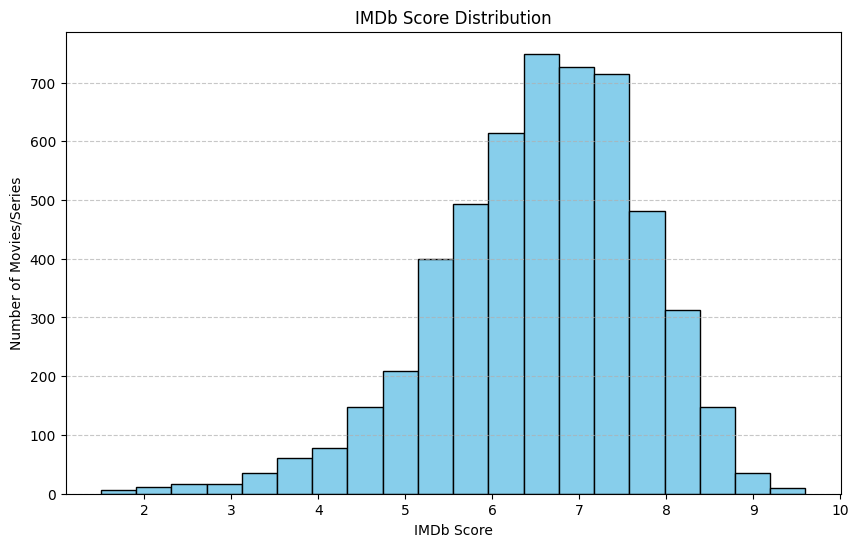

Movies with around 7 points are the majority.
Movies with scores below 4 points and above 9 points are in the minority.


In [84]:
# Histogram showing the distribution of IMDb scores
plt.figure(figsize=(10, 6))
plt.hist(df['imdb_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('IMDb Score Distribution')
plt.xlabel('IMDb Score')
plt.ylabel('Number of Movies/Series')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show histogram
plt.show()
print('Movies with around 7 points are the majority.')
print('Movies with scores below 4 points and above 9 points are in the minority.')

### Show - Movie Distribution Analysis 

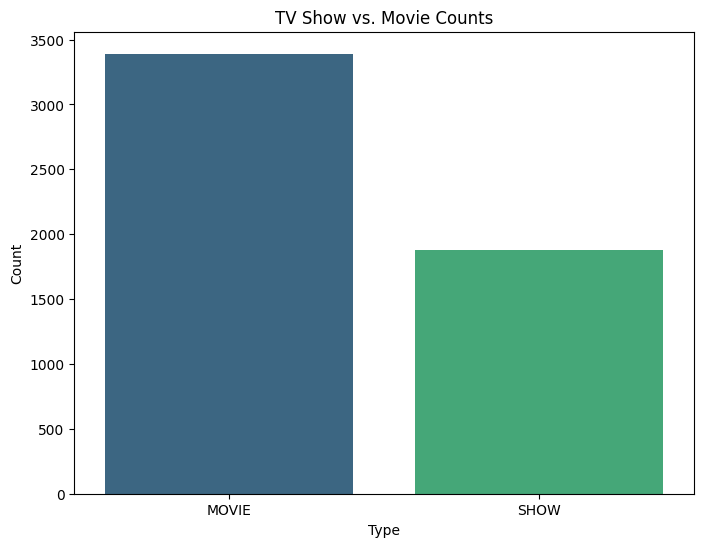

In [89]:
# Number of TV shows and movies
counts = df['type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette='viridis', legend=False)
plt.title('TV Show vs. Movie Counts')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [85]:
# Movies with an imdb score higher than 9 
high_rate_movies_9 = df[df['imdb_score']>=9]
high_rate_movies_9.head(5)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
24,24,tm76557,No Longer Kids,MOVIE,"By coincidence, Ahmad discovers that his fathe...",1979,NaN,235,tt8312792,9.0,943.0
194,194,ts28516,Okupas,SHOW,"During the year 2000, Ricardo, Pollo, Walter a...",2000,TV-MA,40,tt0289649,9.0,2326.0
229,229,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,tt0903747,9.5,1727694.0
245,245,ts3371,Avatar: The Last Airbender,SHOW,"In a war-torn world of elemental magic, a youn...",2005,TV-Y7,24,tt0417299,9.3,297336.0
256,256,ts11313,DEATH NOTE,SHOW,Light Yagami is an ace student with great pros...,2006,TV-14,24,tt0877057,9.0,302147.0


In [86]:
print(f"Number of movies with imdb score higher than 9 :", len(high_rate_movies_9))

Number of movies with imdb score higher than 9 : 21


In [87]:
print(high_rate_movies_9[['title', 'imdb_votes', 'imdb_score']].sort_values(by='imdb_votes', ascending=False))

print("\n\n Analis : There are many movies with an IMDB score higher than 9 but the total number of votes is less than 10000. ")

                                           title  imdb_votes  imdb_score
229                                 Breaking Bad   1727694.0         9.5
860                              Attack on Titan    325381.0         9.0
256                                   DEATH NOTE    302147.0         9.0
245                   Avatar: The Last Airbender    297336.0         9.3
4429                                      Arcane    175412.0         9.1
3026                              The Last Dance    108321.0         9.1
673                              Hunter x Hunter     87857.0         9.0
3597                                Kota Factory     66985.0         9.3
3144                                  Our Planet     41386.0         9.3
3172    David Attenborough: A Life on Our Planet     31180.0         9.0
2685                           C/o Kancharapalem      6562.0         9.0
1346                                  Reply 1988      6557.0         9.2
1189  Leah Remini: Scientology and the Aftermath   

In [16]:
print("Movies with an IMDB score higher than 9: \n\n ")
print(high_rate_movies_9[(high_rate_movies_9['type'] == 'MOVIE')][['title', 'imdb_votes', 'imdb_score']].sort_values(by='imdb_votes', ascending=False))

Movies with an IMDB score higher than 9: 

 
                                         title  imdb_votes  imdb_score
3172  David Attenborough: A Life on Our Planet     31180.0         9.0
2685                         C/o Kancharapalem      6562.0         9.0
24                              No Longer Kids       943.0         9.0
822       Chhota Bheem & Krishna in Mayanagari         5.0         9.0


In [17]:
# Filter movies with an IMDb score higher than 9 and more than 10,000 votes
print(high_rate_movies_9[high_rate_movies_9['imdb_votes'] > 10000][['title', 'imdb_votes', 'imdb_score']].sort_values(by='imdb_votes', ascending=False))

                                         title  imdb_votes  imdb_score
229                               Breaking Bad   1727694.0         9.5
860                            Attack on Titan    325381.0         9.0
256                                 DEATH NOTE    302147.0         9.0
245                 Avatar: The Last Airbender    297336.0         9.3
4429                                    Arcane    175412.0         9.1
3026                            The Last Dance    108321.0         9.1
673                            Hunter x Hunter     87857.0         9.0
3597                              Kota Factory     66985.0         9.3
3144                                Our Planet     41386.0         9.3
3172  David Attenborough: A Life on Our Planet     31180.0         9.0


In [18]:
print("Shows with an IMDB score higher than 9: \n\n ")
print(high_rate_movies_9[(high_rate_movies_9['type'] == 'SHOW')][['title', 'imdb_votes', 'imdb_score']].sort_values(by='imdb_votes', ascending=False))
print('''
The shows Raja, Rasoi Aur Anya Kahaniyaan, Who Rules The World, and 
#ABtalks have very high IMDB scores, but their IMDB ratings are very few. 
So IMDB scores alone cannot give an idea about the quality of a movie.
''')


Shows with an IMDB score higher than 9: 

 
                                           title  imdb_votes  imdb_score
229                                 Breaking Bad   1727694.0         9.5
860                              Attack on Titan    325381.0         9.0
256                                   DEATH NOTE    302147.0         9.0
245                   Avatar: The Last Airbender    297336.0         9.3
4429                                      Arcane    175412.0         9.1
3026                              The Last Dance    108321.0         9.1
673                              Hunter x Hunter     87857.0         9.0
3597                                Kota Factory     66985.0         9.3
3144                                  Our Planet     41386.0         9.3
1346                                  Reply 1988      6557.0         9.2
1189  Leah Remini: Scientology and the Aftermath      5761.0         9.0
1953                                   My Mister      5481.0         9.2
622    

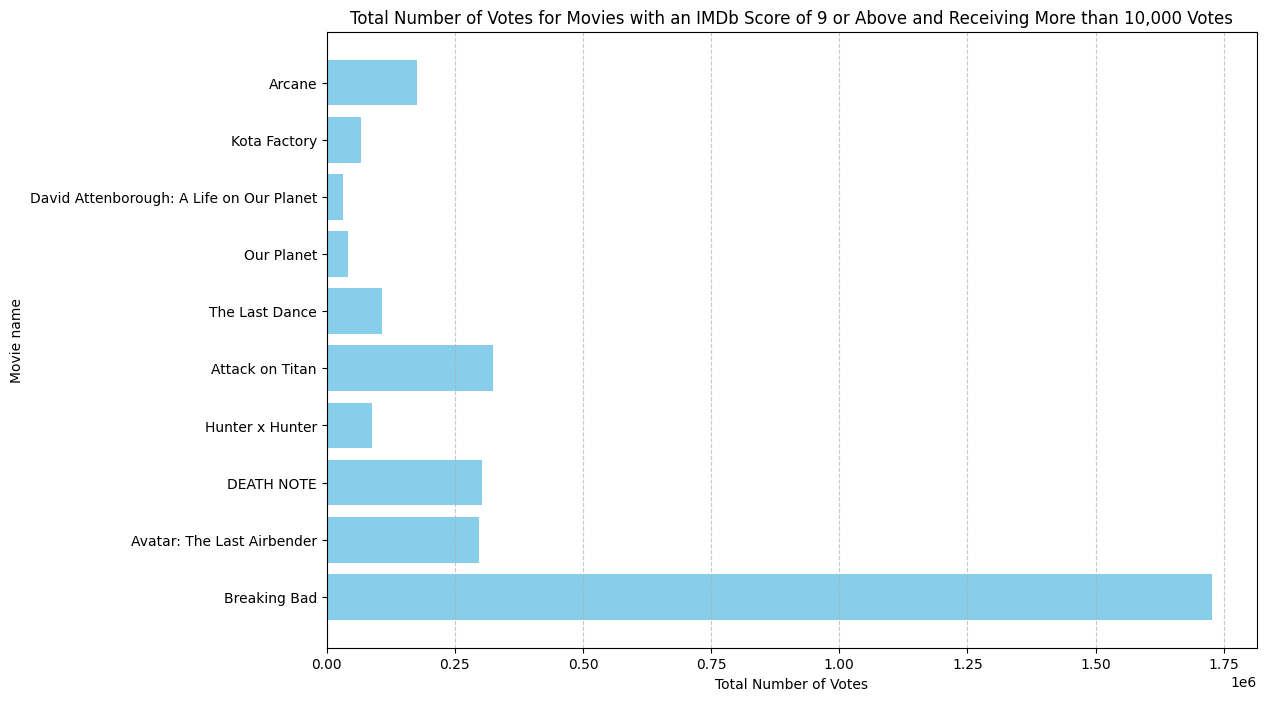


 Visualizing movies with an IMDb score of 9 or more and more than 10,000 votes will give us a better idea.


In [90]:
# Filter movies with IMDb score higher than 9 and more than 10,000 votes
high_rate_movies_9_filtered = high_rate_movies_9[high_rate_movies_9['imdb_votes'] > 10000]

# (Bar Chart)
plt.figure(figsize=(12, 8))
plt.barh(high_rate_movies_9_filtered['title'], high_rate_movies_9_filtered['imdb_votes'], color='skyblue')
plt.title('Total Number of Votes for Movies with an IMDb Score of 9 or Above and Receiving More than 10,000 Votes')
plt.xlabel('Total Number of Votes')
plt.ylabel('Movie name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print("\n Visualizing movies with an IMDb score of 9 or more and more than 10,000 votes will give us a better idea.")

### Runtime - What are the top 5 most watched movies and shows?

- Most rewatched movie: No Longer Kids
- Most rewatched show: 1994

In [20]:
df['type'].unique()

array(['MOVIE', 'SHOW'], dtype=object)

In [31]:
# The top five most rewatched movies
runtime_top5_movies = df[df['type'] == 'MOVIE'].sort_values(by = 'runtime', ascending = False)
runtime_top5_movies.head(5)


,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
24,24,tm76557,No Longer Kids,MOVIE,"By coincidence, Ahmad discovers that his fathe...",1979,NaN,235,tt8312792,9.0,943.0
45,45,tm180542,Once Upon a Time in America,MOVIE,A former Prohibition-era Jewish gangster retur...,1984,R,229,tt0087843,8.3,342335.0
495,495,tm25842,A Lion in the House,MOVIE,Five families struggle with the ups and downs ...,2006,NaN,225,tt0492472,8.7,312.0
378,378,tm43399,Lagaan: Once Upon a Time in India,MOVIE,"In 1890s India, an arrogant British commander ...",2001,PG,224,tt0169102,8.1,111053.0
428,428,tm29269,Jodhaa Akbar,MOVIE,Jodhaa Akbar is a sixteenth century love story...,2008,PG-13,213,tt0449994,7.5,32188.0


In [26]:
runtime_top5_shows = df[df['type'] == 'SHOW'].sort_values(by = 'runtime', ascending = False)
runtime_top5_shows.head(5)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
3598,3598,ts90995,1994,SHOW,Archival video and new interviews examine Mexi...,2019,TV-MA,178,tt10243640,7.5,514.0
371,371,ts15986,Dead Set,SHOW,Zombies are rampaging throughout Britain. Blis...,2008,TV-MA,141,tt1285482,7.6,19684.0
4570,4570,ts108042,Maya and the Three,SHOW,A Mesoamerican warrior princess embarks on a q...,2021,TV-Y7,131,tt8787772,8.1,3597.0
1332,1332,ts78325,Sinatra: All or Nothing at All,SHOW,An up-close and personal examination of the li...,2015,TV-14,122,tt3838978,8.0,2354.0
4089,4089,ts269844,Paava Kadhaigal,SHOW,"At times dark, at times disturbing, four short...",2020,NaN,118,tt13206988,8.1,6628.0


### The analyses according to 'age_certification'

- Almost half of the age_certification column is null values. In order to make a correct analysis, I create a new df and delete these values from my data.

In [33]:
df['age_certification'].unique()

array(['R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-MA', 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

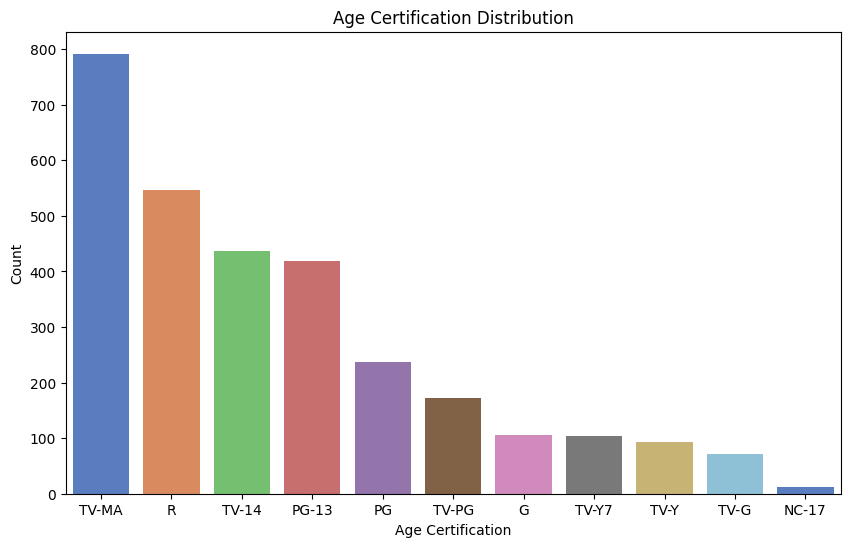

In [92]:
# Age Certification Distribution
certification_counts = df['age_certification'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=certification_counts.index, y=certification_counts.values, hue=certification_counts.index, palette='muted', legend=False)
plt.title('Age Certification Distribution')
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.show()

#### Explanation of different type of age certifications : 
'R' = Adults(+18) 
'PG' = Older Kids (+7)
'TV-14' = Young Adults (+16)
'G' = Kids (All)
'PG-13' = Teens(+13)
'TV-MA' = Adults(+18)
'TV-PG' = Local Rating Values 
'TV-Y' = Kids (All)
'TV-G' = Kids (All)
'TV-Y7' = Older Kids (+7) 
'NC-17' = Adults(+18) 

In [34]:
print(f"We have {len(df['age_certification'].unique())} different type of age")

We have 12 different type of age


In [43]:
print("The number of non null values on age_certification column is: ")
print(df['age_certification'].isnull().sum())

print("The number of non values on age_certification column is: ")
print(df['age_certification'].count())

The number of non null values on age_certification column is: 
2278
The number of non values on age_certification column is: 
2989


In [46]:
clear_age_df = df.dropna(subset=['age_certification'])

#### As you can see in the description, there are more than one value for the same age group. I collect these values by age group.

In [ ]:
# Function to update the age_certification column
def update_age_certification(value):
    if value in ['R', 'TV-MA', 'NC-17']:
        return 'Adults(+18)'
    elif value == 'PG':
        return 'Older Kids(+7)'
    elif value == 'TV-14':
        return 'Young Adults(+16)'
    elif value == 'G':
        return 'Kids(All)'
    elif value == 'PG-13':
        return 'Teens(+13)'
    elif value in ['TV-PG', 'TV-Y', 'TV-G']:
        return 'Local Rating Values'
    elif value == 'TV-Y7':
        return 'Older Kids(+7)'
    else:
        return value

# Update Age Certification column
clear_age_df['age_certification'] = clear_age_df['age_certification'].apply(update_age_certification)

In [49]:
clear_age_df['age_certification'].value_counts()

age_certification
Adults(+18)            1351
Young Adults(+16)       436
Teens(+13)              418
Older Kids(+7)          341
Local Rating Values     338
Kids(All)               105
Name: count, dtype: int64

In [56]:
# Select movies from the 'Adults(+18)' category
adults_movies = clear_age_df[clear_age_df['age_certification'] == 'Adults(+18)']

# Sort by views and choose the top five
top_adults_movies = adults_movies.sort_values(by='imdb_votes', ascending=False).head(5)

print("The top five most watched movies and shows in the Adults(+18) category:")
print(top_adults_movies[['title', 'imdb_votes']])

The top five most watched movies and shows in the Adults(+18) category:
                   title  imdb_votes
229         Breaking Bad   1727694.0
662     Django Unchained   1472668.0
104  Saving Private Ryan   1346020.0
230     The Walking Dead    945125.0
0            Taxi Driver    795222.0


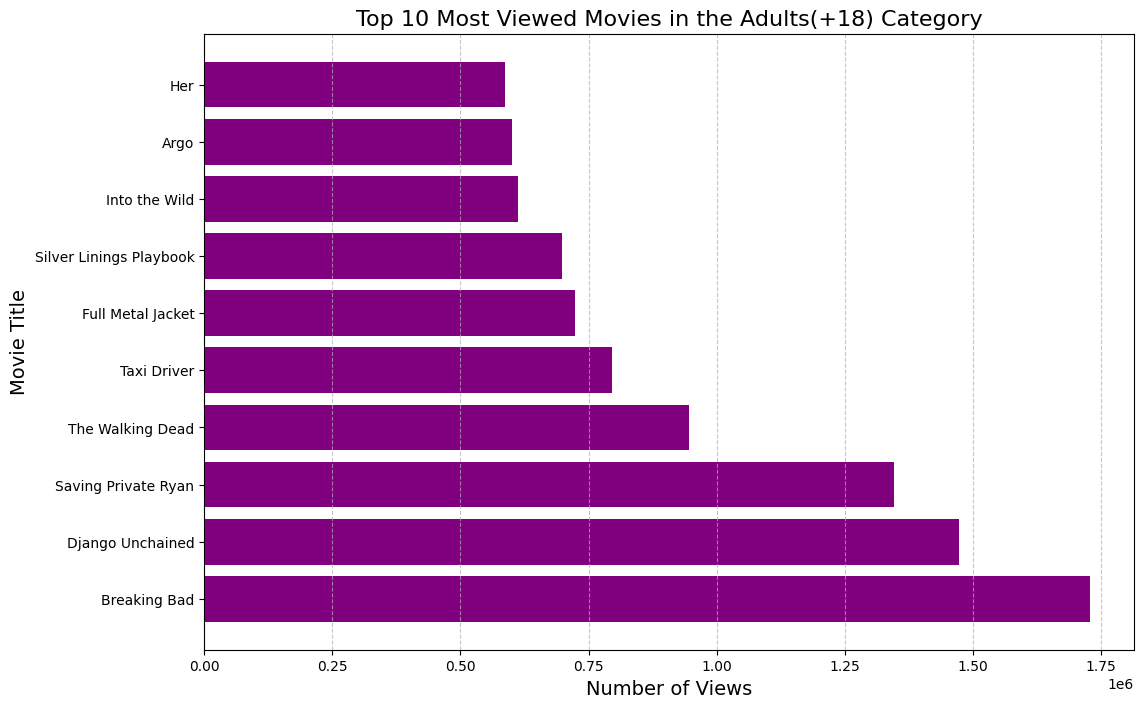

In [55]:
# Select movies in the 'Adults(+18)' category
adults_movies = clear_age_df[clear_age_df['age_certification'] == 'Adults(+18)']

# Sort by the number of votes and select the top 10
top_adults_movies = adults_movies.sort_values(by='imdb_votes', ascending=False).head(10)

# Visualization (Bar Chart)
plt.figure(figsize=(12, 8))
plt.barh(top_adults_movies['title'], top_adults_movies['imdb_votes'], color='purple')
plt.title('Top 10 Most Viewed Movies in the Adults(+18) Category', fontsize=16)
plt.xlabel('Number of Views', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Comparing IMDB scores and votes from different release years 

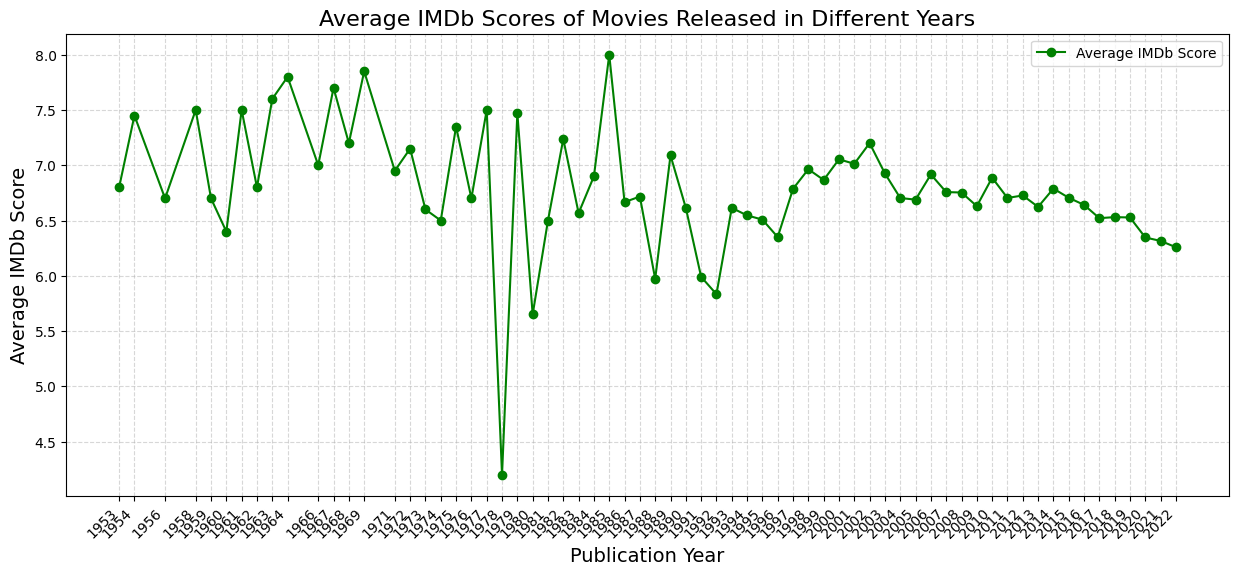


 There is a serious decrease in the average IMDB scores of the films of 1979.


In [67]:
# Average IMDb score by years
average_imdb_score = df.groupby('release_year')['imdb_score'].mean()

# Line chart (Average IMDb Score)
plt.figure(figsize=(15, 6))
plt.plot(average_imdb_score.index, average_imdb_score, label='Average IMDb Score', marker='o', color='green')
plt.title('Average IMDb Scores of Movies Released in Different Years', fontsize=16)
plt.xlabel('Publication Year', fontsize=14)
plt.ylabel('Average IMDb Score', fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.xticks(average_imdb_score.index, rotation=45, ha='right')  
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()

print("\n There is a serious decrease in the average IMDB scores of the films of 1979.")


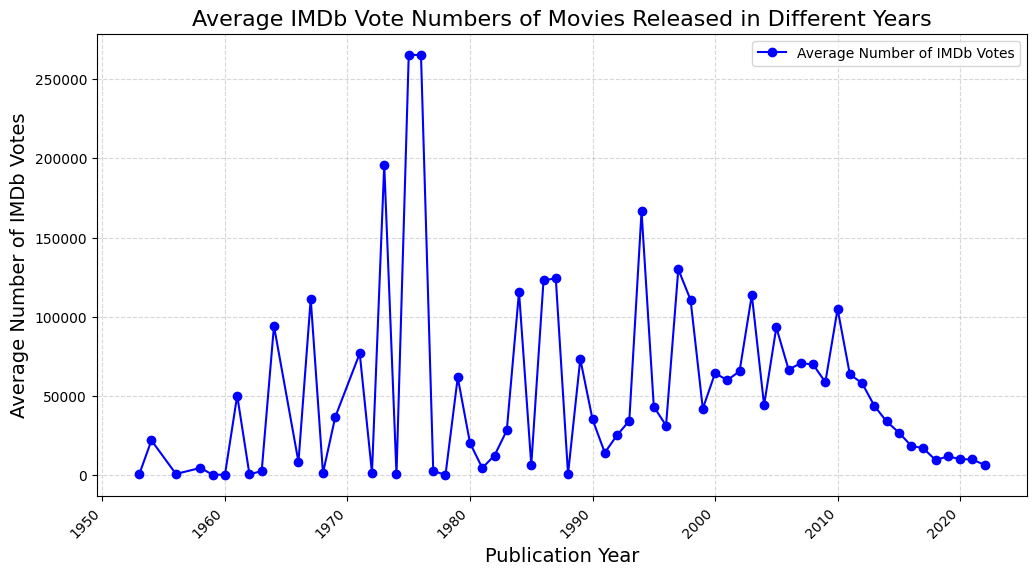

In [71]:
# Average number of IMDb votes by year
average_imdb_votes = df.groupby('release_year')['imdb_votes'].mean()

# Line chart (Average IMDb Votes)
plt.figure(figsize=(12, 6))
plt.plot(average_imdb_votes.index, average_imdb_votes, label='Average Number of IMDb Votes', marker='o', color='blue')
plt.title('Average IMDb Vote Numbers of Movies Released in Different Years', fontsize=16)
plt.xlabel('Publication Year', fontsize=14)
plt.ylabel('Average Number of IMDb Votes', fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()


### Relation between runtime and IMDb score

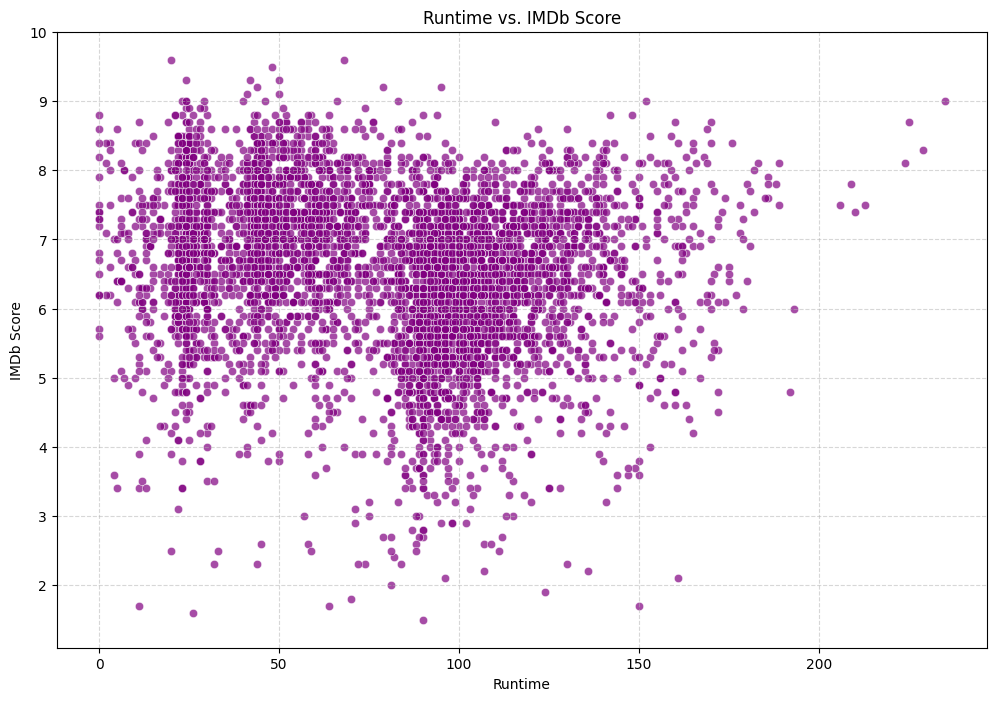

Analysis: All movies and shows with a run time of more than 200 have a score higher than 7.


In [98]:
# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='runtime', y='imdb_score', data=df, color='purple', alpha=0.7)
plt.title('Runtime vs. IMDb Score')
plt.xlabel('Runtime')
plt.ylabel('IMDb Score')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()

print("Analysis: All movies and shows with a run time of more than 200 have a score higher than 7.")

##### Movies and shows with a run time of more than 200 and a score higher than 9

- No Longer Kids

In [97]:
df[(df['runtime']>200) & (df['imdb_score']>=9)]

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
24,24,tm76557,No Longer Kids,MOVIE,"By coincidence, Ahmad discovers that his fathe...",1979,NaN,235,tt8312792,9.0,943.0


### Tendency of movies to be released over the years

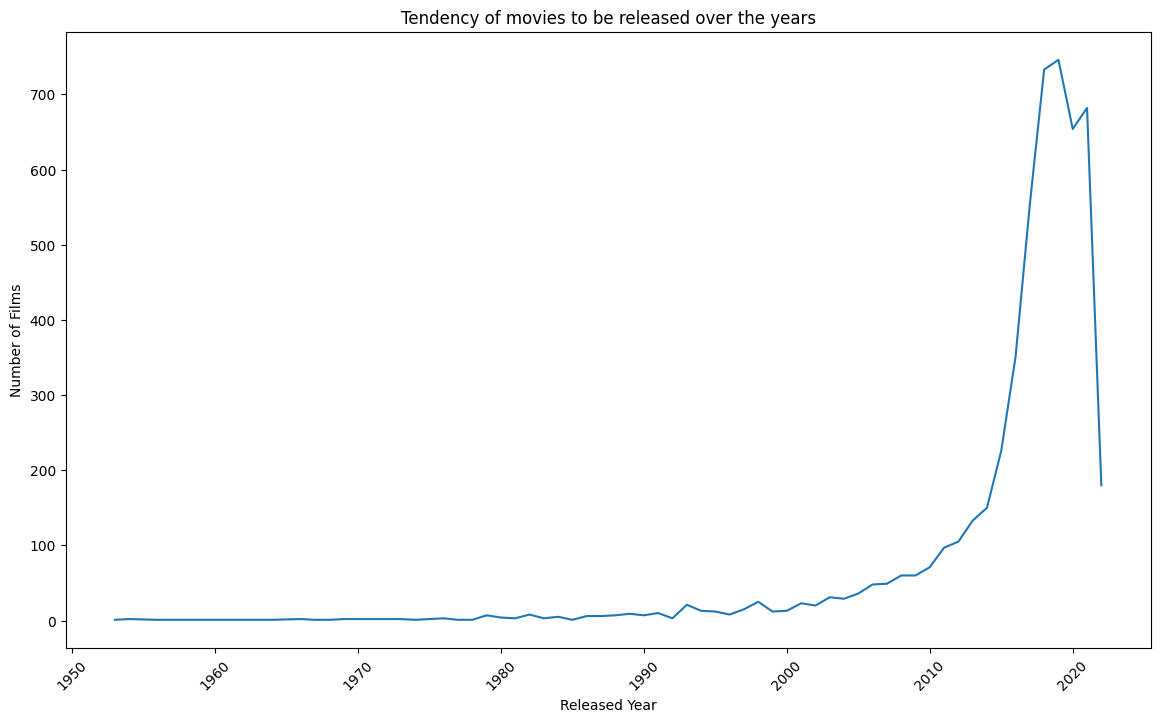

In [103]:
movie_count = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x=movie_count.index, y=movie_count.values)
plt.title('Tendency of movies to be released over the years')
plt.xlabel('Released Year')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()